<a href="https://colab.research.google.com/github/allpirez/hello-world/blob/main/tutorial-fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [24]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # input layer
  keras.layers.Dense(128, activation='relu'),  #hidden layer
  keras.layers.Dense(10, activation='softmax')  #output layer
])


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1849 - accuracy: 0.9297
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1801 - accuracy: 0.9337
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1778 - accuracy: 0.9334
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1715 - accuracy: 0.9355
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1683 - accuracy: 0.9370


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8912
Test accuracy:  0.8912000060081482


Pullover


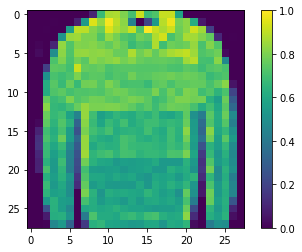

In [57]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[20])])
plt.figure()
plt.imshow(test_images[20])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 45


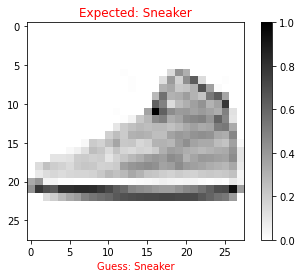

In [71]:
COLOR = 'red'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
